# Pass Network Plot using Python, Statsbomb API & MPLSoccer

### Pulling data from Statsbomb API

In [1]:
from statsbombpy import sb

In [2]:
sb.competitions().head()

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
sb.matches(competition_id=11, season_id=90).head()

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,...,2022-08-04T12:00,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
1,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,...,2022-08-04T12:00,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2
2,3773497,2021-04-10,21:00:00.000,Spain - La Liga,2020/2021,Real Madrid,Barcelona,2,1,available,...,2022-08-04T12:00,30,Regular Season,Estadio Alfredo Di Stéfano,Jesús Gil Manzano,Zinédine Zidane,Ronald Koeman,1.1.0,2,2
3,3773660,2020-12-13,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Levante,1,0,available,...,2022-08-04T12:00,13,Regular Season,Spotify Camp Nou,Ricardo De Burgos Bengoetxea,Ronald Koeman,Francisco José López Fernández,1.1.0,2,2
4,3773593,2020-09-27,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Villarreal,4,0,available,...,2022-08-04T12:00,3,Regular Season,Spotify Camp Nou,Guillermo Cuadra Fernández,Ronald Koeman,Unai Emery Etxegoien,1.1.0,2,2


In [4]:
sb.lineups(match_id=3773631)['Barcelona'].head()

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,4447,Martin Braithwaite Christensen,Martin Braithwaite,9,Denmark,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
1,5203,Sergio Busquets i Burgos,Sergio Busquets,5,Spain,"[{'time': '73:04', 'card_type': 'Yellow Card',...","[{'position_id': 10, 'position': 'Center Defen..."
2,5211,Jordi Alba Ramos,Jordi Alba,18,Spain,[],"[{'position_id': 6, 'position': 'Left Back', '..."
3,5477,Ousmane Dembélé,None,11,France,"[{'time': '63:53', 'card_type': 'Yellow Card',...","[{'position_id': 17, 'position': 'Right Wing',..."
4,5487,Antoine Griezmann,None,7,France,[],"[{'position_id': 23, 'position': 'Center Forwa..."


In [5]:
import pandas as pd
events = sb.events(match_id=3773631)
events = pd.DataFrame(events)

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


### Selecting and cleaing the relevant 'Passes' data 

In [6]:
df = sb.events(match_id=3773631, split=True, flatten_attrs=False)["passes"]
df.head()

/Users/appletest/opt/anaconda3/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,location,duration,related_events,pass,match_id,possession_team_id,player_id,under_pressure,counterpress,off_camera
0,3c824f32-fcd1-4191-b824-26bb32d9bd6c,5,1,00:00:00.992,0,0,Pass,2,Real Betis,From Kick Off,...,"[60.0, 40.0]",1.137457,[953b857b-55b9-4f14-974c-63e2929e6de1],"{'recipient': {'id': 2948, 'name': 'Nabil Feki...",3773631,218,11391,NaN,NaN,NaN
1,723a939c-cc2f-49a9-8b95-20373c926cc6,7,1,00:00:02.130,0,2,Pass,2,Real Betis,From Kick Off,...,"[56.7, 41.1]",1.100128,[59962ded-d646-4f9c-bf6d-ebba06ef28d3],"{'recipient': {'id': 42282, 'name': 'Paul Edga...",3773631,218,2948,NaN,NaN,NaN
2,90973a59-4f2e-436c-a982-45a6fd35280d,10,1,00:00:04.345,0,4,Pass,2,Real Betis,From Kick Off,...,"[43.5, 37.6]",1.746256,[f719fb9a-1271-49c5-9051-3c7e7154e0e9],"{'recipient': {'id': 6752, 'name': 'Víctor Ruí...",3773631,218,42282,NaN,NaN,NaN
3,5d05e5a3-ccce-46b9-8436-b140ee4f51fd,13,1,00:00:07.271,0,7,Pass,2,Real Betis,From Kick Off,...,"[30.2, 25.3]",1.486695,[6040c0e0-1813-4a68-85ec-3f8ecdeee7c6],"{'recipient': {'id': 6648, 'name': 'Aïssa Mand...",3773631,218,6752,NaN,NaN,NaN
4,887eb3ef-9531-433a-95a2-b15295834cd9,17,1,00:00:09.422,0,9,Pass,2,Real Betis,From Kick Off,...,"[27.8, 46.1]",1.672701,"[8e78399b-61d6-40ef-8244-2f4a62e9dc71, 9d10e36...","{'recipient': {'id': 6851, 'name': 'Aitor Ruib...",3773631,218,6648,True,NaN,NaN


In [7]:
import json
df = df[df['possession_team'] == 'Barcelona']
l = df['pass']
l = pd.json_normalize(l)
l = l[['recipient.id','recipient.name','outcome.id','outcome.name']]
df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,location,duration,related_events,pass,match_id,possession_team_id,player_id,under_pressure,counterpress,off_camera
19,9c50f2cc-9d20-4132-990d-14a34b08965d,63,1,00:01:00.161,1,0,Pass,3,Barcelona,Regular Play,...,"[14.1, 40.0]",2.067720,[783e4174-5325-4525-8289-98921ebf6262],"{'recipient': {'id': 43728, 'name': 'Óscar Min...",3773631,217,20055,NaN,NaN,NaN
20,29475b7b-cfa6-4a14-b72c-cd3e8ff521f0,66,1,00:01:04.944,1,4,Pass,3,Barcelona,Regular Play,...,"[49.7, 72.3]",0.805902,[b240a416-6b71-4fb9-ab6f-0407aa75eaf3],"{'recipient': {'id': 5477, 'name': 'Ousmane De...",3773631,217,43728,NaN,NaN,NaN
21,6a6e5072-7ccb-423e-a90a-7301874aedb3,69,1,00:01:06.817,1,6,Pass,3,Barcelona,Regular Play,...,"[55.0, 77.9]",0.733772,[5206da2b-a73a-4b9d-9589-c3630bf5f0aa],"{'recipient': {'id': 6947, 'name': 'Miralem Pj...",3773631,217,5477,NaN,NaN,NaN
22,18b83ce8-9723-461a-b8ec-2924612226d0,72,1,00:01:07.629,1,7,Pass,3,Barcelona,Regular Play,...,"[55.8, 71.9]",0.759210,[b65c446e-cc2c-43d4-84a3-e43cd374cd97],"{'recipient': {'id': 5477, 'name': 'Ousmane De...",3773631,217,6947,NaN,NaN,NaN
23,bff88994-54a5-4011-aa20-4d956cc89dd4,74,1,00:01:08.388,1,8,Pass,3,Barcelona,Regular Play,...,"[49.7, 77.1]",1.791278,[df981a15-dd8e-4bf6-bccc-f7ab3ed9436e],"{'recipient': {'id': 32480, 'name': 'Ronald Fe...",3773631,217,5477,NaN,NaN,NaN


In [8]:
df['passer'] = df['player_id']
df['recipient'] = df['player_id'].shift(-1)
df = df.dropna(subset=['recipient'])
df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,related_events,pass,match_id,possession_team_id,player_id,under_pressure,counterpress,off_camera,passer,recipient
19,9c50f2cc-9d20-4132-990d-14a34b08965d,63,1,00:01:00.161,1,0,Pass,3,Barcelona,Regular Play,...,[783e4174-5325-4525-8289-98921ebf6262],"{'recipient': {'id': 43728, 'name': 'Óscar Min...",3773631,217,20055,NaN,NaN,NaN,20055,43728.0
20,29475b7b-cfa6-4a14-b72c-cd3e8ff521f0,66,1,00:01:04.944,1,4,Pass,3,Barcelona,Regular Play,...,[b240a416-6b71-4fb9-ab6f-0407aa75eaf3],"{'recipient': {'id': 5477, 'name': 'Ousmane De...",3773631,217,43728,NaN,NaN,NaN,43728,5477.0
21,6a6e5072-7ccb-423e-a90a-7301874aedb3,69,1,00:01:06.817,1,6,Pass,3,Barcelona,Regular Play,...,[5206da2b-a73a-4b9d-9589-c3630bf5f0aa],"{'recipient': {'id': 6947, 'name': 'Miralem Pj...",3773631,217,5477,NaN,NaN,NaN,5477,6947.0
22,18b83ce8-9723-461a-b8ec-2924612226d0,72,1,00:01:07.629,1,7,Pass,3,Barcelona,Regular Play,...,[b65c446e-cc2c-43d4-84a3-e43cd374cd97],"{'recipient': {'id': 5477, 'name': 'Ousmane De...",3773631,217,6947,NaN,NaN,NaN,6947,5477.0
23,bff88994-54a5-4011-aa20-4d956cc89dd4,74,1,00:01:08.388,1,8,Pass,3,Barcelona,Regular Play,...,[df981a15-dd8e-4bf6-bccc-f7ab3ed9436e],"{'recipient': {'id': 32480, 'name': 'Ronald Fe...",3773631,217,5477,NaN,NaN,NaN,5477,32480.0


In [9]:
df = df.astype({"passer":'int', "recipient":'int'}) 
df10 = pd.concat([df, df["location"].apply(pd.Series)], axis=1)
df10.rename(columns = {0:'x', 1:'y'}, inplace = True)
df10.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,match_id,possession_team_id,player_id,under_pressure,counterpress,off_camera,passer,recipient,x,y
19,9c50f2cc-9d20-4132-990d-14a34b08965d,63,1,00:01:00.161,1,0,Pass,3,Barcelona,Regular Play,...,3773631,217,20055,NaN,NaN,NaN,20055,43728,14.1,40.0
20,29475b7b-cfa6-4a14-b72c-cd3e8ff521f0,66,1,00:01:04.944,1,4,Pass,3,Barcelona,Regular Play,...,3773631,217,43728,NaN,NaN,NaN,43728,5477,49.7,72.3
21,6a6e5072-7ccb-423e-a90a-7301874aedb3,69,1,00:01:06.817,1,6,Pass,3,Barcelona,Regular Play,...,3773631,217,5477,NaN,NaN,NaN,5477,6947,55.0,77.9
22,18b83ce8-9723-461a-b8ec-2924612226d0,72,1,00:01:07.629,1,7,Pass,3,Barcelona,Regular Play,...,3773631,217,6947,NaN,NaN,NaN,6947,5477,55.8,71.9
23,bff88994-54a5-4011-aa20-4d956cc89dd4,74,1,00:01:08.388,1,8,Pass,3,Barcelona,Regular Play,...,3773631,217,5477,NaN,NaN,NaN,5477,32480,49.7,77.1


In [10]:
avg_loc = df10.groupby('passer').agg({'x':['mean'],'y':['mean', 'count']})
avg_loc.columns = ['x','y','count']
avg_loc.head()

,x,y,count
passer,,,
2948,58.733333,18.000000,3
4447,75.376923,18.538462,13
5203,60.897674,41.406977,86
5211,68.379032,11.230645,62
5477,81.670000,62.788000,50


In [11]:
pass_between = df10.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis = 'columns', inplace = True)
pass_between = pass_between.merge(avg_loc, left_on = 'passer', right_index = True)
pass_between = pass_between.merge(avg_loc, left_on = 'recipient', right_index = True, suffixes = ['','_end'] )
pass_between = pass_between[pass_between['pass_count']>3]
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
35,5211,20055,4,68.379032,11.230645,62,10.650000,42.407500,40
105,6826,20055,6,42.496429,31.832143,84,10.650000,42.407500,40
120,6947,20055,4,65.714062,50.750000,64,10.650000,42.407500,40
133,8118,20055,8,49.747126,52.085057,87,10.650000,42.407500,40
181,30486,20055,4,63.527027,36.843243,37,10.650000,42.407500,40
...,...,...,...,...,...,...,...,...,...
110,6826,43728,6,42.496429,31.832143,84,58.544643,71.350000,56
123,6947,43728,8,65.714062,50.750000,64,58.544643,71.350000,56
137,8118,43728,10,49.747126,52.085057,87,58.544643,71.350000,56
183,30486,43728,5,63.527027,36.843243,37,58.544643,71.350000,56


### Plotting the data using MPLSoccer

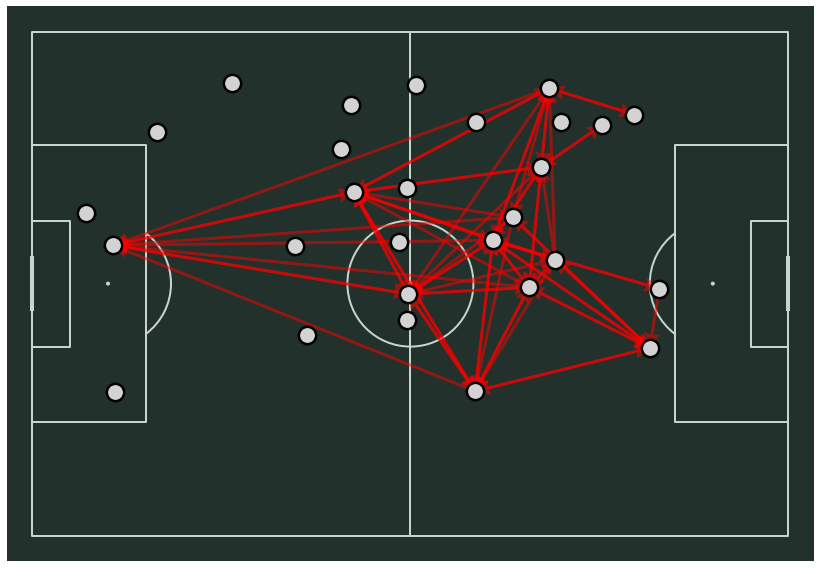

In [12]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_type = 'statsbomb',
             pitch_color = '#22312b', line_color = '#c7d5cc')
fig, ax = pitch.draw(figsize =(13,8))
arros = pitch.arrows(1.2*pass_between.x, .8*pass_between.y, 1.2*pass_between.x_end,
                     .8*pass_between.y_end, ax = ax,
                    width = 3, headwidth = 5, color = 'red', zorder = 1, alpha = .5)
node = pitch.scatter(1.2*avg_loc.x,.8*avg_loc.y,
                    s = 300, color = '#d3d3d3', edgecolors = 'black',
                     linewidth = 2.5, alpha =1, zorder = 1, ax =ax)
